In [1]:
import pandas as pd
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, GlobalAvgPool2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
y_train = train_df["label"].values
x_train = train_df[train_df.keys().drop(["label"])].values.reshape(-1,28,28,1)
x_train = x_train/255

In [4]:
test = test_df.values
test = test/255
test = test.reshape(-1, 28,28,1)

In [5]:
y_train = to_categorical(y_train, num_classes=10)

In [6]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

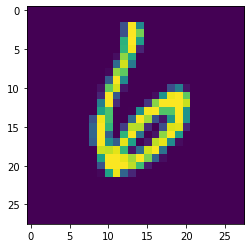

In [8]:
plt.imshow(x_train[0][:,:,0])

In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=(28,28,1), activation="relu", padding="Same"))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding="Same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="Same"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="Same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
igen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.1,
    height_shift_range=0.1
)
igen.fit(x_train)

In [19]:
model.fit(igen.flow(x_train, y_train, batch_size=16), epochs=100, validation_data=(x_val, y_val),
         verbose = 2, steps_per_epoch=x_train.shape[0] // 16)

Epoch 1/100
 - 14s - loss: 0.0769 - accuracy: 0.9773 - val_loss: 0.0256 - val_accuracy: 0.9935
Epoch 2/100
 - 14s - loss: 0.0759 - accuracy: 0.9789 - val_loss: 0.0277 - val_accuracy: 0.9923
Epoch 3/100
 - 14s - loss: 0.0748 - accuracy: 0.9791 - val_loss: 0.0330 - val_accuracy: 0.9907
Epoch 4/100
 - 14s - loss: 0.0759 - accuracy: 0.9784 - val_loss: 0.0268 - val_accuracy: 0.9921
Epoch 5/100
 - 14s - loss: 0.0797 - accuracy: 0.9778 - val_loss: 0.0232 - val_accuracy: 0.9926
Epoch 6/100
 - 15s - loss: 0.0779 - accuracy: 0.9783 - val_loss: 0.0275 - val_accuracy: 0.9915
Epoch 7/100
 - 15s - loss: 0.0783 - accuracy: 0.9787 - val_loss: 0.0274 - val_accuracy: 0.9931
Epoch 8/100
 - 15s - loss: 0.0778 - accuracy: 0.9777 - val_loss: 0.0270 - val_accuracy: 0.9920
Epoch 9/100
 - 15s - loss: 0.0723 - accuracy: 0.9795 - val_loss: 0.0305 - val_accuracy: 0.9927
Epoch 10/100
 - 14s - loss: 0.0805 - accuracy: 0.9772 - val_loss: 0.0308 - val_accuracy: 0.9921
Epoch 11/100
 - 15s - loss: 0.0872 - accuracy: 0.

KeyboardInterrupt: 

In [ ]:
result = model.predict(test)

In [ ]:
result = np.argmax(result, axis=1)

In [ ]:
result

In [ ]:
sub = pd.read_csv("sample_submission (1).csv")

In [ ]:
sub["Label"] = result

In [ ]:
sub.to_csv("try3.csv", index=False)